<a href="https://colab.research.google.com/github/githubforkj/signate/blob/main/mufj/mufj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標

**入賞**

# 概要


- クラウドファンディングの資金調達達成の成否予測
    - 定量データである目標金額など
    - テキストデータであるアピール文章


---

## 当面の方針


1. パイプライン・実験環境を構築し、様々なモデルを試したる。


# 実装

## ごにょごにょする


そして、データの中身をざっくりと理解する

In [ ]:
# signateとの連携

!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 41.9 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8c70a1a76d0615f5c0cece940b975ad3ebb4421869d860982469b27a7753a431
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
requests 2.23.0 requires urllib3!

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [6]:
# コンペのデータをダウンロード
!signate download --competition-id={754}

sample_submit.csv

train.csv

test.csv


Download completed.


### インストール

In [36]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd

test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [16]:
train.head()

,id,goal,country,duration,category1,category2,html_content,state
0,train_00000,20001-21000,US,45,art,mixed media,"<div class=""contents""><div><p><a href=""http://...",1
1,train_00001,19001-20000,US,59,food,restaurants,"<div class=""contents""><div><p>Cultural Pretzel...",0
2,train_00002,2001-3000,US,38,art,performance art,"<div class=""contents""><div><p>I want to perfor...",0
3,train_00003,1001-2000,US,30,art,mixed media,"<div class=""contents""><div><div class=""templat...",1
4,train_00004,1001-2000,US,29,film & video,webseries,"<div class=""contents""><div><p>The story of the...",1


In [17]:
print(train.shape)
print(test.shape)

(9791, 8)
(9800, 7)


In [30]:
train.columns

Index(['id', 'goal', 'country', 'duration', 'category1', 'category2',
       'html_content', 'state'],
      dtype='object')

In [46]:
# 成立の集合
p_train = train[train['state']==1]
# 不成立の集合
n_train = train[train['state']==0]

(4971, 8)

In [49]:
print('成立:目標額')
print(p_train['goal'].value_counts())
print('--------------------------------------------------------')
print('不成立:目標額')
print(n_train['goal'].value_counts())
print('--------------------------------------------------------')
print('成立:国')
print(p_train['country'].value_counts())
print('--------------------------------------------------------')
print('不成立:国')
print(n_train['country'].value_counts())
print('--------------------------------------------------------')
print('成立:期間')
print(p_train['duration'].value_counts())
print('--------------------------------------------------------')
print('不成立:期間')
print(n_train['duration'].value_counts())
print('--------------------------------------------------------')
print('成立:カテゴリー1')
print(p_train['category1'].value_counts())
print('--------------------------------------------------------')
print('不成立:カテゴリー1')
print(n_train['category1'].value_counts())
print('--------------------------------------------------------')
print('成立:カテゴリー2')
print(p_train['category2'].value_counts())
print('--------------------------------------------------------')
print('不成立:カテゴリー2')
print(n_train['category2'].value_counts())
print('--------------------------------------------------------')
print('成立・不成立の総数')
print(train['state'].value_counts())
print('--------------------------------------------------------')

成立
1-1000         1311
1001-2000       671
2001-3000       520
4001-5000       436
3001-4000       373
               ... 
84001-85000       1
32001-33000       1
37001-38000       1
40001-41000       1
82001-83000       1
Name: goal, Length: 69, dtype: int64
--------------------------------------------------------
不成立
1-1000         804
1001-2000      479
2001-3000      408
4001-5000      386
9001-10000     296
              ... 
93001-94000      1
91001-92000      1
96001-97000      1
87001-88000      1
48001-49000      1
Name: goal, Length: 94, dtype: int64
--------------------------------------------------------
成立
US    3455
GB     557
CA     214
AU     104
FR      76
DE      68
MX      63
HK      41
DK      36
IT      32
SE      29
NL      27
ES      23
IE      18
JP      16
NZ      15
CH      13
NO      10
SG      10
BE       7
AT       5
LU       1
Name: country, dtype: int64
--------------------------------------------------------
不成立
US    3450
GB     456
CA     242
AU     17

## 前処理

In [19]:
#学習用データと評価用データを結合する (両データに対し一括で前処理を行うため)
combined = train.append(test, ignore_index=True)

In [20]:
combined.shape

(19591, 8)

In [22]:
#以下の手順でdescriptionデータのクリーニングを行う.
# <li>などのhtmlタグを削除する
# アルファベット以外の文字をスペースに置き換える
# 単語長が3文字以下のものは削除する
# ステミング（単語の語幹を取り出す作業のこと. 派生語を同じ単語として扱えるようにする）

import re
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def cleaning(texts):
    clean_texts = []
    for text in texts:
        # htmlタグを削除
        text = remove_tag(text)
        #アルファベット以外をスペースに置き換え
        clean_punc = re.sub(r'[^a-zA-Z]', ' ', text)
        #単語長が3文字以下のものは削除する
        clean_short_tokenized = [word for word in clean_punc.split() if len(word) > 3]
        #ステミング
        clean_normalize = [stemmer.stem(word) for word in clean_short_tokenized]
        #単語同士をスペースでつなぎ, 文章に戻す
        clean_text = ' '.join(clean_normalize)
        clean_texts.append(clean_text)
    return clean_texts

def remove_tag(x):
    p = re.compile(r"<[^>]*?>")
    return p.sub('',x)

combined_cleaned = combined.copy()
combined_cleaned['html_content'] = cleaning(combined['html_content'])

In [24]:
from sklearn.model_selection import train_test_split

# 学習データとテストデータに分割し直す
delimit_num = train.shape[0]
train = combined_cleaned[:delimit_num]
test = combined_cleaned[delimit_num:]

# 学習データをさらに、学習データと検証データに分割する
x_train, x_valid, y_train, y_valid = train_test_split(train, train['state'], test_size=0.3, random_state=0)

In [26]:
### モデリング直前のデータの整形確認
print("x_train.shape:",x_train.shape)
# このx_trainに対して学習を行う
print("x_valid.shape:",x_valid.shape)
print("y_train.shape:",y_train.shape)
print("y_valid.shape:",y_valid.shape)
print("test.shape:",test.shape)

x_train.shape: (6853, 8)
x_valid.shape: (2938, 8)
y_train.shape: (6853,)
y_valid.shape: (2938,)
test.shape: (9800, 8)


### クリーンアップ後のテキストをワードクラウドで可視化してみる

#### 【要修正】成否別にみる事は勿論、国別、期間別、カテゴリー別にワードクラウドを見たい。使用言語が国別に異なっていた場合、国別でのみ可視化することにする。


- イメージ
    - 国別
        - アメリカ
            - 成立
            - 不成立
        - カナダ
            - 成立
            - 不成立
    - 期間別
        - 30日
            - 成立
            - 不成立

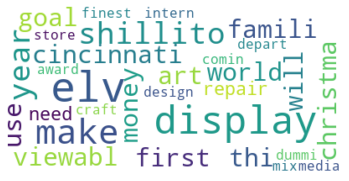

In [44]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = train['html_content'][0]

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()